<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience2/blob/main/36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis

In [1]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import torch

In [2]:
task_ = "sentiment-analysis"

def get_sentiment(text, model, tokenizer, task=task_):
  pipe = pipeline(task=task_, model=model, tokenizer=tokenizer)
  sentiment_result = pipe(text)
  return sentiment_result

In [3]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [4]:
text = ["you are simply dumped.", "not allowed to assist me", "good experience", "bon appetit"]

In [5]:
get_sentiment(text, model, tokenizer)

[{'label': '1 star', 'score': 0.7782317996025085},
 {'label': '1 star', 'score': 0.4448460638523102},
 {'label': '4 stars', 'score': 0.5123401880264282},
 {'label': '4 stars', 'score': 0.4847792685031891}]

#Name Entitiy Recognition

In [6]:
from transformers import BertForTokenClassification

In [13]:
task_ = "ner"

In [16]:
def get_ner_results(text, model, tokenizer, task=task_):
    nlp = pipeline(task, model=model, tokenizer=tokenizer)
    ner_results = nlp(text)
    # Calculate the character start and end positions of each entity manually
    tokens = tokenizer.tokenize(text)
    offset = 0  # Offset to track character positions in the original text
    updated_results = []
    for result in ner_results:
        word = result['word'].lstrip("##")  # Remove subword prefix if present
        start = text.find(word, offset)
        end = start + len(word)
        if start != -1:  # Only update if the word was found
            result['start'] = start
            result['end'] = end
            updated_results.append(result)
            offset = end  # Update offset to next possible start position
    return updated_results

def highlight_entities(text, ner_results):
    highlighted_text = text
    # Reverse sort by start index to not mess up the indices when adding brackets
    for entity in sorted(ner_results, key=lambda x: x['start'], reverse=True):
        start, end = entity['start'], entity['end']
        highlighted_text = highlighted_text[:end] + "]" + highlighted_text[end:]
        highlighted_text = highlighted_text[:start] + "[" + highlighted_text[start:]
    return highlighted_text

In [9]:
model_name = "dbmdz/bert-large-cased-finetuned-conll03-english"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForTokenClassification.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [17]:
text = "Obama was born in Honolulu, Hawaii. He graduated from Columbia University in 1983 with a B.A. in political science and later worked as a community organizer in Chicago. In 1988, Obama enrolled in Harvard Law School, where he was the first black president of the Harvard Law Review. He became a civil rights attorney and an academic, teaching constitutional law at the University of Chicago Law School from 1992 to 2004."
ner_result = get_ner_results(text, model, tokenizer)
highlight_entities(text, ner_result)

'[Obama] was born in [Honolulu], [Hawaii]. He graduated from [Columbia] [University] in 1983 with a B.A. in political science and later worked as a community organizer in [Chicago]. In 1988, [Obama] enrolled in [Harvard] [Law] [School], where he was the first black president of the [Harvard] [Law] [Review]. He became a civil rights attorney and an academic, teaching constitutional law at the [University] [of] [Chicago] [Law] [School] from 1992 to 2004.'

#Text Summarization

In [18]:
from transformers import BartTokenizer, BartForConditionalGeneration

In [19]:
def get_summary(text, model, tokenizer):
  summarizer = pipeline(task="summarization", model=model, tokenizer=tokenizer)
  summary = summarizer(text)
  return summary[0]["summary_text"]

In [20]:
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [21]:
text = '''
The Gutenberg Bible, also known as the 42-line Bible, the Mazarin Bible or the B42, was the earliest major book printed in Europe using mass-produced metal movable type. It marked the start of the "Gutenberg Revolution" and the age of printed books in the West. The book is valued and revered for its high aesthetic and artistic qualities[1] and its historical significance.

The Gutenberg Bible is an edition of the Latin Vulgate printed in the 1450s by Johannes Gutenberg in Mainz, in present-day Germany. Forty-nine copies (or substantial portions of copies) have survived. They are thought to be among the world's most valuable books, although no complete copy has been sold since 1978.[2][3] In March 1455, the future Pope Pius II wrote that he had seen pages from the Gutenberg Bible displayed in Frankfurt to promote the edition, and that either 158 or 180 copies had been printed.

The 36-line Bible, said to be the second printed Bible, is also sometimes referred to as a Gutenberg Bible, but may be the work of another printer.
'''

In [22]:
summary = get_summary(text, model, tokenizer)
print(summary)
print(len(text))
print(len(summary))

The Gutenberg Bible is an edition of the Latin Vulgate printed in the 1450s by Johannes Gutenberg in Mainz, in present-day Germany. It marked the start of the "Gutenberg Revolution" and the age of printed books in the West. Forty-nine copies (or substantial portions of copies) have survived. They are thought to be among the world's most valuable books.
1039
354


In [23]:
def get_summary(text, model, tokenizer, max_len, min_len):
  summarizer = pipeline(task="summarization", model=model, tokenizer=tokenizer)
  summary = summarizer(text, max_length=max_len, min_length=min_len)
  return summary[0]["summary_text"]

In [24]:
summary = get_summary(text, model, tokenizer, max_len=10, min_len=2)
print(summary)
print(len(text))
print(len(summary))

The Gutenberg Bible is an edition of
1039
36


#BERT Embeding

In [25]:
import pandas as pd, numpy as np
from tqdm.notebook import tqdm

# dimensionality reduction
!pip install umap-learn
from umap import UMAP
from sklearn.decomposition import PCA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.7 MB/s eta 0:00:00


In [26]:
my_words_list1 = ["clean", "unclean", "dirty", "filty"]

In [27]:
!gdown --id 1fgqbG8lBCT007QDtZLw7VX6wGLsrb8yM #clean
!gdown --id 1lYtuPCSd04gV_DCAjIIcvqMOmMgjR3Ix #dirty
!gdown --id 1CDXzveVTbHW0iNfvHi8CA1cV4xwk6t1d #filthy
!gdown --id 1jRA6IxLVzDX1aH3gqYeSAGOK35hmx9bp #unclean

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1fgqbG8lBCT007QDtZLw7VX6wGLsrb8yM
To: /content/Reza_clean.txt
100% 3.03k/3.03k [00:00<00:00, 9.41MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1lYtuPCSd04gV_DCAjIIcvqMOmMgjR3Ix
To: /content/Reza_dirty.txt
100% 4.13k/4.13k [00:00<00:00, 13.6MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https:

In [28]:
clean_sent = pd.read_csv("Reza_clean.txt", header=None, names=["org_text"])
unclean_sent = pd.read_csv("Reza_unclean.txt", header=None, names=["org_text"])
dirty_sent = pd.read_csv("Reza_dirty.txt", header=None, names=["org_text"])
filthy_sent = pd.read_csv("Reza_filthy.txt", header=None, names=["org_text"])

In [29]:
clean_sent = clean_sent.rename_axis("idx", axis="columns")
unclean_sent = unclean_sent.rename_axis("idx", axis="columns")
dirty_sent = dirty_sent.rename_axis("idx", axis="columns")
filthy_sent = filthy_sent.rename_axis("idx", axis="columns")

In [32]:
df_list = pd.concat([clean_sent, unclean_sent, dirty_sent, filthy_sent], ignore_index=True, sort=False)

In [33]:
df_list.head()

idx,org_text
0,Wonderful bright comfortable and clean rooms
1,Bathroom was clean spacious and airy
2,The room was clean well decorated and the bed ...
3,The whole hotel was very clean
4,The room was exactly how the pictures looked v...


In [34]:
labels = np.zeros(len(df_list))

In [35]:
# Embeddings
import torch
import transformers
from transformers import BertTokenizer, BertModel

In [36]:
n_emb_base = 768
tokenizer_base = BertTokenizer.from_pretrained("bert-base-uncased")
# Load pre-trained model (weights)
model_base = BertModel.from_pretrained("bert-base-uncased", output_hidden_states=True)
# Put the model in "evaluation" mode, meaning feed-forward operation.
model_base.eval()

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [37]:
def getEmbedingBERT(text , desired_word_em, model, tokenizer, layer_num):
  # Run the text through BERT, and collect all of the hidden states produced

  # Convert inputs to PyTorch tensors
  # Mark each of the 22 tokens as belonging to sentence "1".
  marked_text = "[CLS] " + text + " [SEP]"

  # Split the sentence into tokens.
  tokenized_text = tokenizer.tokenize(marked_text)
  # Map the token strings to their vocabulary indeces.
  indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

  try:
    idx = np.where(np.array(tokenized_text) == desired_word_em)[0][0]
  except:
    print('except !!!!!!!!!!!!!!!!!!!', text)
    pass

  segments_ids = [1] * len(tokenized_text)
  tokens_tensor = torch.tensor([indexed_tokens])
  segments_tensors = torch.tensor([segments_ids])

  tokenized_text = tokenizer.tokenize(marked_text)
  with torch.no_grad():
    outputs = model(tokens_tensor, segments_tensors)


    hidden_states = outputs[2]
    token_embeddings = torch.stack(hidden_states, dim=0)
    token_embeddings = torch.squeeze(token_embeddings, dim=1)
    token_embeddings = token_embeddings[layer_num-1, idx, :]
    # bert_semcor_index.append(idx)
  return token_embeddings

In [38]:
layer_num = 9

In [39]:
#Semcor BERT embedding
emb_BERT_clean = np.zeros((len(clean_sent) , n_emb_base))
#extract bert_base embedding
for i in tqdm(range(len(clean_sent))):
  # text = remove_puncs(clean_sent.values[i][0])
  # text = text.lower()
  try:
    em = getEmbedingBERT(clean_sent.values[i][0], 'clean', model_base, tokenizer_base, layer_num)
    emb_BERT_clean[i] = em
    labels[i] = 0
  except:
    print('except ************')
    pass

idx_hold_base = np.where(np.sum(emb_BERT_clean, axis=1)!=0)[0]
emb_BERT_clean = emb_BERT_clean[idx_hold_base]
print(emb_BERT_clean.shape)

  0%|          | 0/50 [00:00<?, ?it/s]

(50, 768)


In [40]:
emb_BERT_unclean1 = np.zeros((len(unclean_sent) , n_emb_base))
#extract bert_base embedding
for i in tqdm(range(len(unclean_sent))):
  # text = remove_puncs(unclean_sent.values[i][0])
  # text = text.lower()
  try:
    em =   getEmbedingBERT(unclean_sent.values[i][0], 'uncle', model_base, tokenizer_base, layer_num)
    emb_BERT_unclean1[i] = em
    labels[i+50] = 1
  except:
    print('except ************')
    pass

idx_hold_base = np.where(np.sum(emb_BERT_unclean1, axis=1)!=0)[0]
emb_BERT_unclean1 = emb_BERT_unclean1[idx_hold_base]
print(emb_BERT_unclean1.shape)

  0%|          | 0/50 [00:00<?, ?it/s]

(50, 768)


In [41]:
emb_BERT_unclean2 = np.zeros((len(unclean_sent) , n_emb_base))
#extract bert_base embedding
for i in tqdm(range(len(unclean_sent))):
  # text = remove_puncs(unclean_sent.values[i][0])
  # text = text.lower()
  try:
    em =   getEmbedingBERT(unclean_sent.values[i][0], '##an', model_base, tokenizer_base, layer_num)
    emb_BERT_unclean2[i] = em

  except:
    print('except ************')
    pass

idx_hold_base = np.where(np.sum(emb_BERT_unclean2, axis=1)!=0)[0]
emb_BERT_unclean2 = emb_BERT_unclean2[idx_hold_base]
print(emb_BERT_unclean2.shape)

  0%|          | 0/50 [00:00<?, ?it/s]

(50, 768)


In [42]:
emb_BERT_unclean = np.mean((emb_BERT_unclean1, emb_BERT_unclean2), axis=0)

In [43]:
emb_BERT_filthy = np.zeros((len(filthy_sent) , n_emb_base))
#extract bert_base embedding
for i in tqdm(range(len(filthy_sent))):
  # text = remove_puncs(filthy_sent.values[i][0])
  # text = text.lower()
  try:
    em =   getEmbedingBERT(filthy_sent.values[i][0], 'filthy', model_base, tokenizer_base, layer_num)
    emb_BERT_filthy[i] = em
    labels[i+100] = 2
  except:
    print('except ************')
    pass

idx_hold_base = np.where(np.sum(emb_BERT_filthy, axis=1)!=0)[0]
emb_BERT_filthy = emb_BERT_filthy[idx_hold_base]
print(emb_BERT_filthy.shape)

  0%|          | 0/50 [00:00<?, ?it/s]

(50, 768)


In [44]:
emb_BERT_dirty = np.zeros((len(dirty_sent) , n_emb_base))
#extract bert_base embedding
for i in tqdm(range(len(dirty_sent))):
  # text = remove_puncs(dirty_sent.values[i][0])
  # text = text.lower()
  try:
    em =   getEmbedingBERT(dirty_sent.values[i][0], 'dirty', model_base, tokenizer_base, layer_num)
    emb_BERT_dirty[i] = em
    labels[i+150] = 3

  except:
    print('except ************')
    pass

idx_hold_base = np.where(np.sum(emb_BERT_dirty, axis=1)!=0)[0]
emb_BERT_dirty = emb_BERT_dirty[idx_hold_base]
print(emb_BERT_dirty.shape)

  0%|          | 0/50 [00:00<?, ?it/s]

(50, 768)


In [45]:
BERT_emb_list = np.concatenate((emb_BERT_clean, emb_BERT_unclean, emb_BERT_filthy, emb_BERT_dirty))
df_list['Label'] = (labels.astype(int).tolist())

In [46]:
#PCA setup
pca_2C_list = PCA(n_components=2, random_state=0)
pca_bert_2C_list = pca_2C_list.fit_transform(BERT_emb_list)

#UMAP setup
umap_2C_list = UMAP(n_components=2, n_neighbors=10, random_state=42)
umap_bert_2C_list = umap_2C_list.fit_transform(BERT_emb_list)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [47]:
from sklearn.preprocessing import MinMaxScaler
mm_sc = MinMaxScaler()
pca_bert_2C_list = mm_sc.fit_transform(pca_bert_2C_list)
umap_bert_2C_list = mm_sc.fit_transform(umap_bert_2C_list)

In [48]:
from sklearn.cluster import KMeans
n_clst_lst = 4
bert_kmeans_lst = KMeans(n_clusters=n_clst_lst, random_state=42)
kmeans_labels_bert_lst = bert_kmeans_lst.fit_predict(BERT_emb_list)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'PCA')

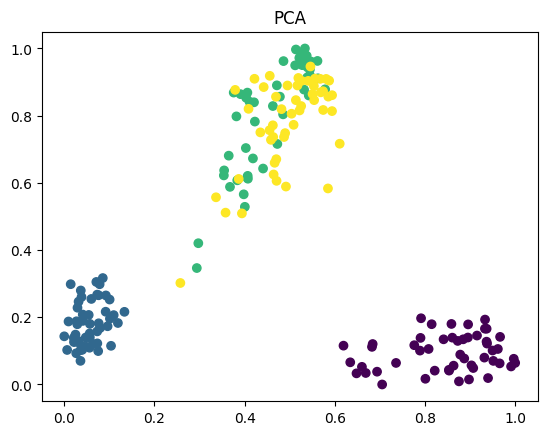

In [49]:
import matplotlib.pyplot as plt
plt.scatter(pca_bert_2C_list[:,0], pca_bert_2C_list[:,1], c=labels)
plt.title("PCA")